# Importing Libraries  and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df=pd.read_csv("C:\\Users\\WIN10\\Desktop\\data without infertility _final.csv")

In [3]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 42
0,1,10001,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,10002,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,10003,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,10004,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,10005,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
#DELETING UNNECESSARY COLS
del df["Unnamed: 42"]
del df['Sl. No']
del df['Patient File No.']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of aborptions      541 non-null    int64  
 14  FSH(mIU/mL)            541 non-null    float64
 15  LH(mIU

In [6]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')

In [7]:
# CHECKING FOR MISSING VALUES
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()
print(df[df.isnull().any(axis=1)][null_columns])

     Marraige Status (Yrs)  AMH(ng/mL)  Fast food (Y/N)
156                    5.0        5.27              NaN
305                    9.0         NaN              0.0
458                    NaN        6.60              0.0


In [8]:
# REPLACING MISSING VALUES BY MEDIAN
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)

In [9]:
df.isna().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
A

# Data Visualisation

In [10]:
#importing clean data
df=pd.read_csv('C:\\Users\\WIN10\\Downloads\\CleanDT.csv')

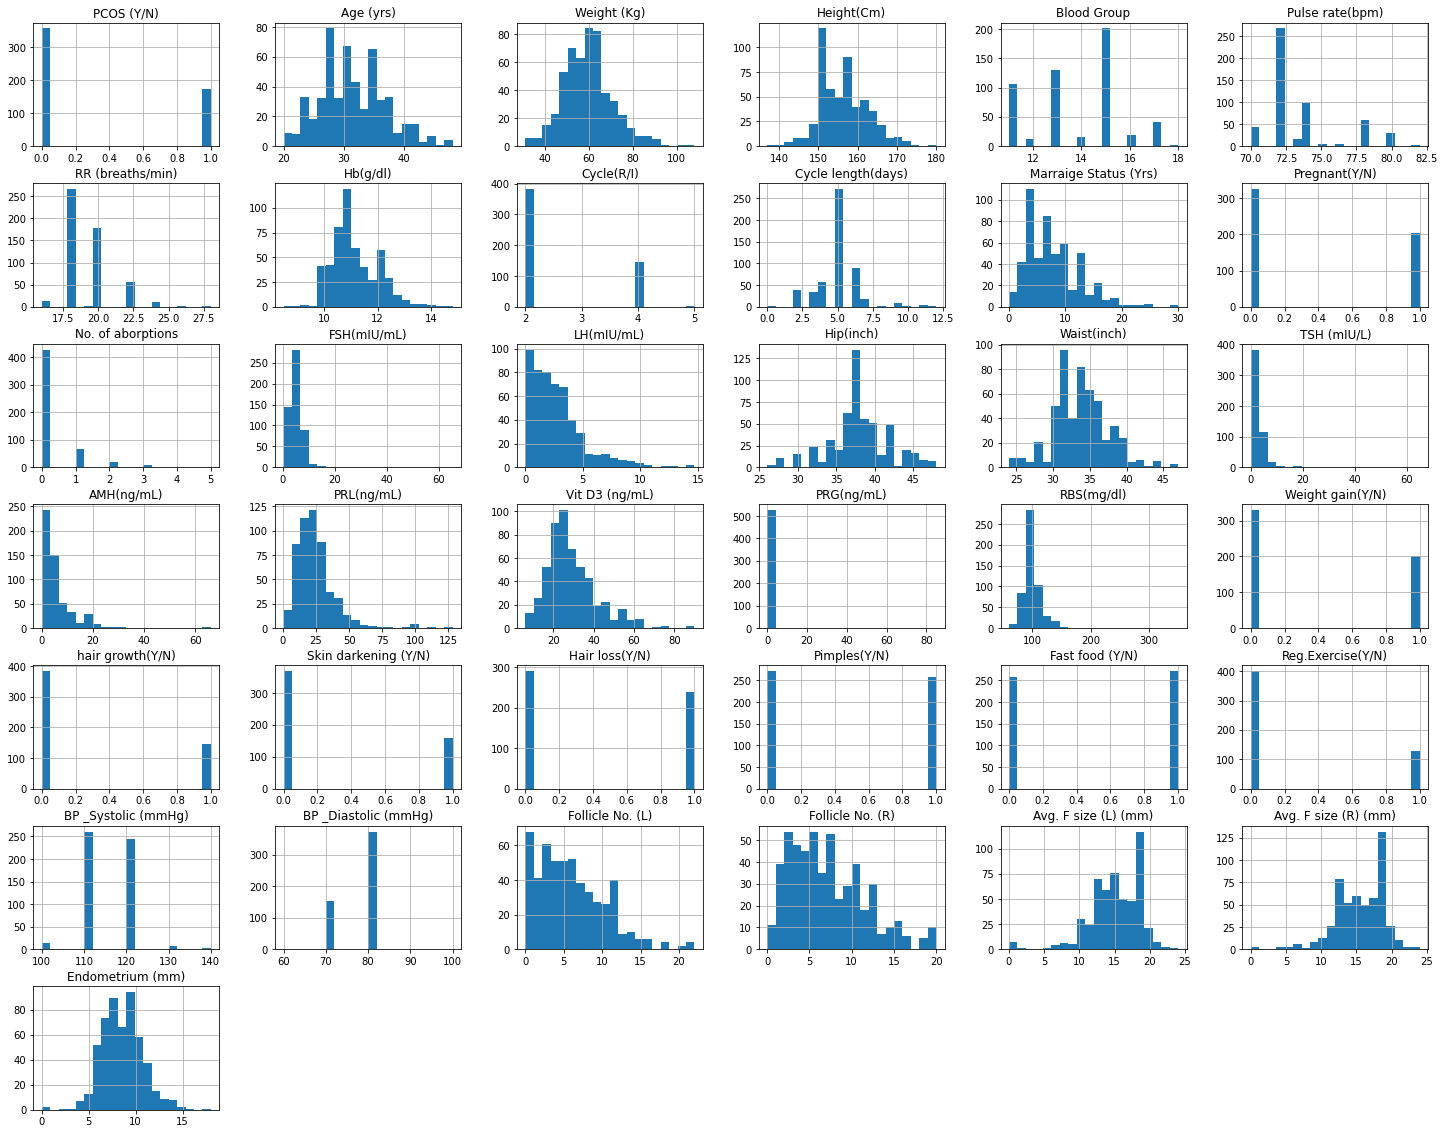

In [11]:
df.hist(figsize=(25,20),bins=20)
plt.show()

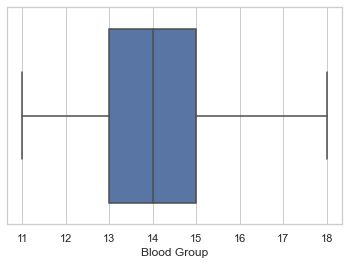

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Blood Group"])



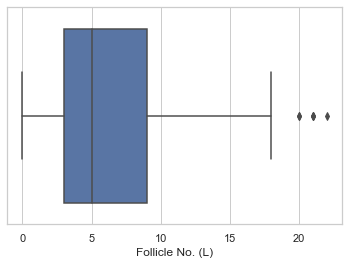

In [13]:
ax1=sns.boxplot(x=df['Follicle No. (L)'])

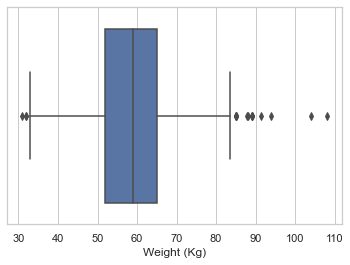

In [14]:
ax2=sns.boxplot(x=df['Weight (Kg)'])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37]),
 [Text(1, 0, 'PCOS (Y/N)'),
  Text(2, 0, 'Age (yrs)'),
  Text(3, 0, 'Weight (Kg)'),
  Text(4, 0, 'Height(Cm)'),
  Text(5, 0, 'Blood Group'),
  Text(6, 0, 'Pulse rate(bpm)'),
  Text(7, 0, 'RR (breaths/min)'),
  Text(8, 0, 'Hb(g/dl)'),
  Text(9, 0, 'Cycle(R/I)'),
  Text(10, 0, 'Cycle length(days)'),
  Text(11, 0, 'Marraige Status (Yrs)'),
  Text(12, 0, 'Pregnant(Y/N)'),
  Text(13, 0, 'No. of aborptions'),
  Text(14, 0, 'FSH(mIU/mL)'),
  Text(15, 0, 'LH(mIU/mL)'),
  Text(16, 0, 'Hip(inch)'),
  Text(17, 0, 'Waist(inch)'),
  Text(18, 0, 'TSH (mIU/L)'),
  Text(19, 0, 'AMH(ng/mL)'),
  Text(20, 0, 'PRL(ng/mL)'),
  Text(21, 0, 'Vit D3 (ng/mL)'),
  Text(22, 0, 'PRG(ng/mL)'),
  Text(23, 0, 'RBS(mg/dl)'),
  Text(24, 0, 'Weight gain(Y/N)'),
  Text(25, 0, 'hair growth(Y/N)'),
  Text(26, 0, 'Skin darkening (Y/N)'),
  Text(27, 0, 

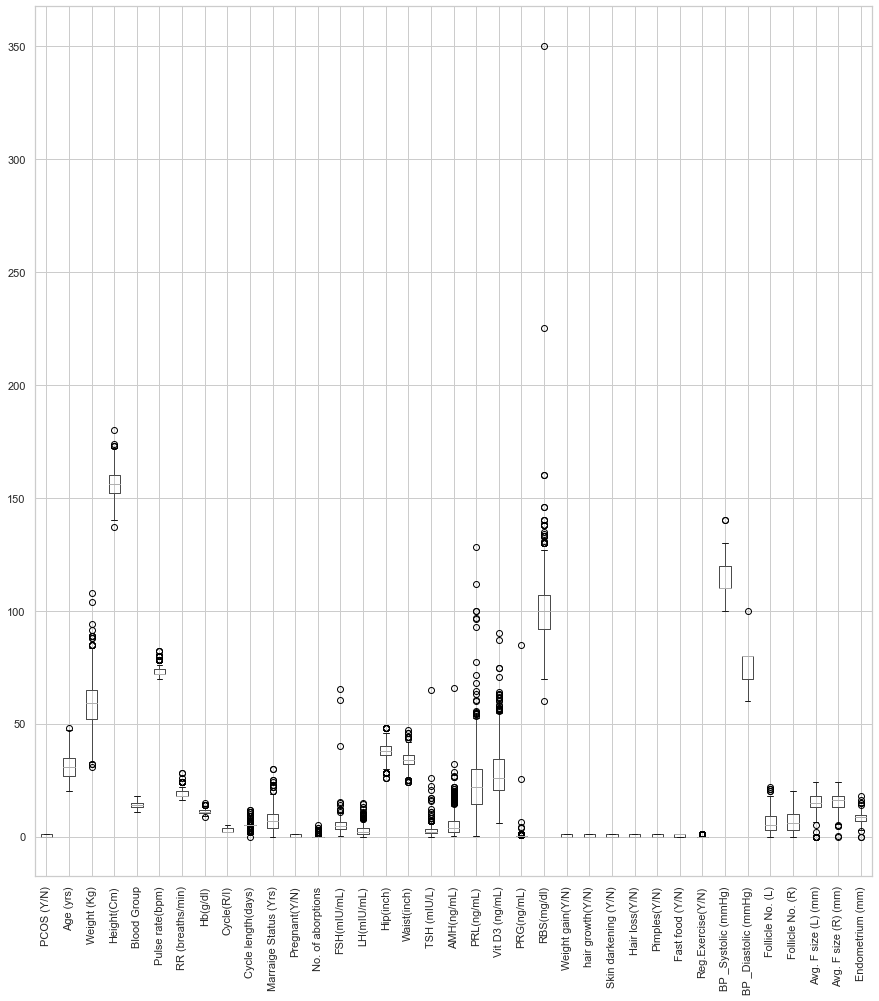

In [15]:
#plotting boxplot for outliers
pd.DataFrame.boxplot(df,figsize=(15,16))
plt.xticks(rotation=90)

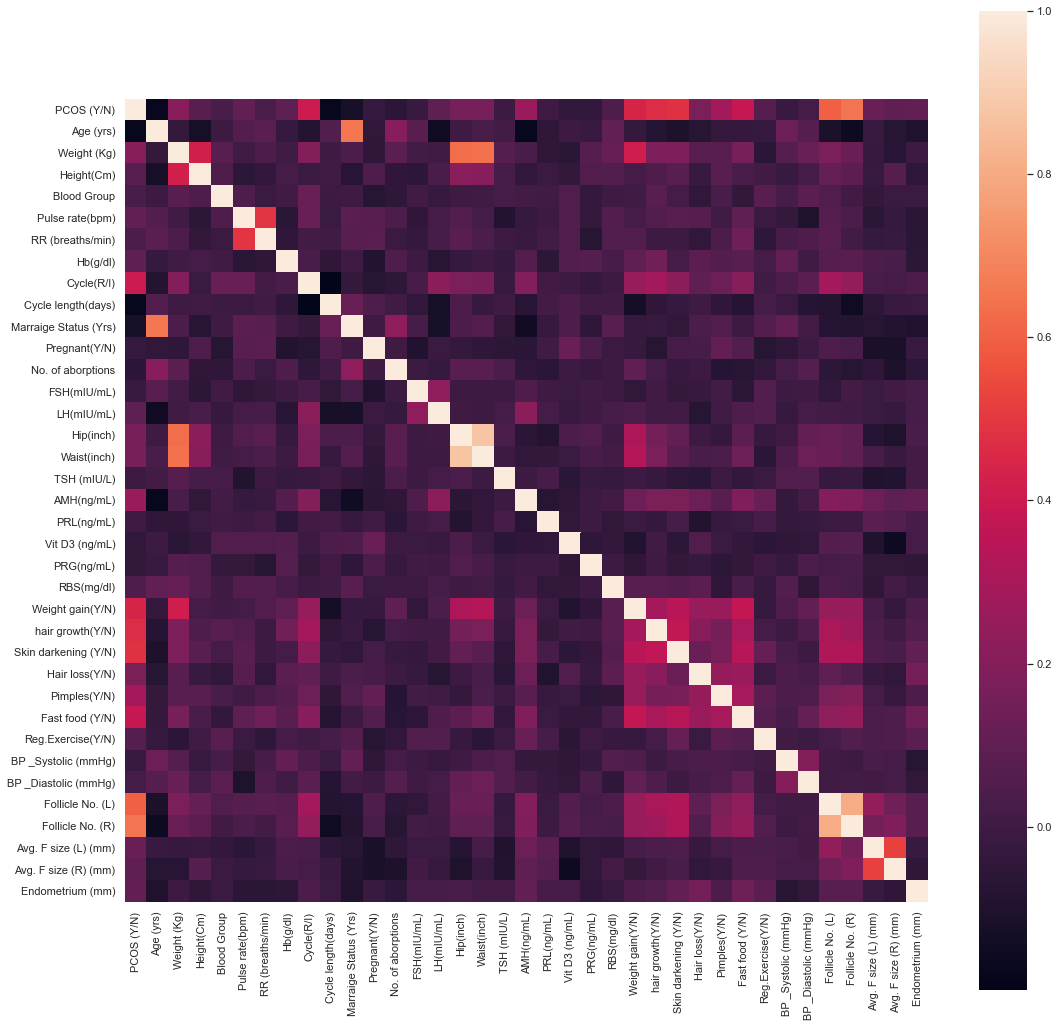

In [16]:
#Examaning the correlation matrix of all the features 

corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, square=True);

In [17]:
#How all the features corelate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)               1.000000
Follicle No. (R)         0.650025
Follicle No. (L)         0.598711
Skin darkening (Y/N)     0.483023
hair growth(Y/N)         0.469131
Weight gain(Y/N)         0.440847
Cycle(R/I)               0.399442
Fast food (Y/N)          0.384027
Pimples(Y/N)             0.286143
AMH(ng/mL)               0.264041
Weight (Kg)              0.210414
Hair loss(Y/N)           0.175349
Hip(inch)                0.163307
Waist(inch)              0.161852
Avg. F size (L) (mm)     0.126547
Endometrium (mm)         0.105429
Pulse rate(bpm)          0.104106
Avg. F size (R) (mm)     0.095996
Hb(g/dl)                 0.091695
LH(mIU/mL)               0.091355
Height(Cm)               0.076991
Reg.Exercise(Y/N)        0.069558
RBS(mg/dl)               0.047742
RR (breaths/min)         0.038987
Blood Group              0.030158
BP _Diastolic (mmHg)     0.017766
PRL(ng/mL)              -0.002097
TSH (mIU/L)             -0.005168
BP _Systolic (mmHg)     -0.017598
FSH(mIU/mL)   

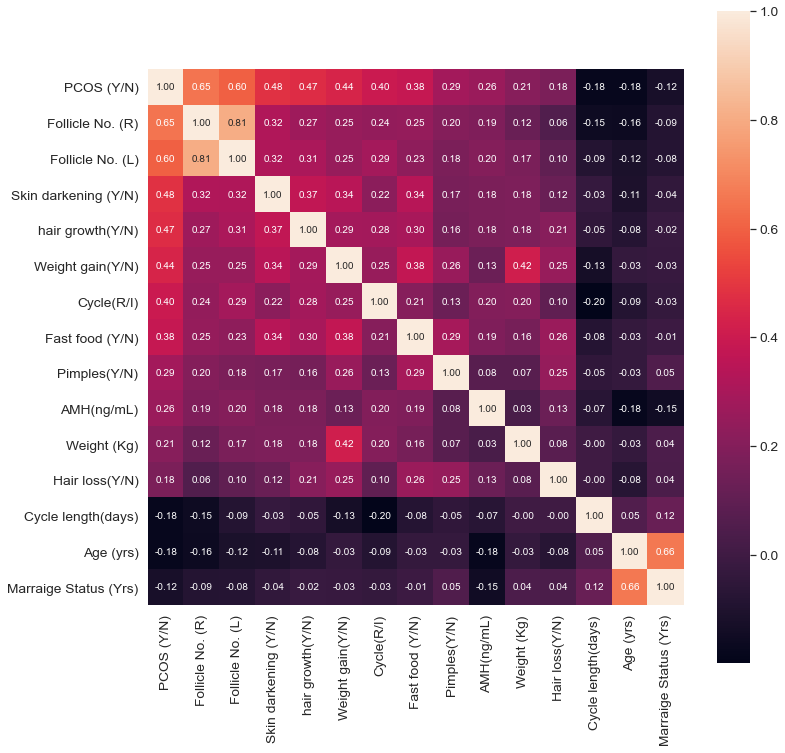

In [18]:
#Having a look at features bearing significant corelation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model Building

In [19]:
X= df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

# Fitting Radom Forest Classifier

In [20]:
rfc = RandomForestClassifier(n_estimators=9)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [21]:
print("Random forest model accuracy(in %):", metrics.accuracy_score(y_test, rfc_predict)*100)

Random forest model accuracy(in %): 87.42857142857143


In [22]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=var)
    rfc = RandomForestClassifier(n_estimators=9)
    rfc.fit(X_train,y_train)
    # predictions
    rfc_predict = rfc.predict(X_test)
    score = metrics.accuracy_score(y_test, rfc_predict)*100
    if (score > max):
        max = score
    average_accuracy += score
print(average_accuracy/542)
print (max)

87.21138639957826
93.71428571428572


# Fitting Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

import warnings
warnings.filterwarnings('ignore')

C:\Users\WIN10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
y_pred = lr.predict(X_test)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 89.71428571428571


In [25]:
average_accuracy = 0
max = 0
for var in range(0,542):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)*100
    if (max < score):
        max = score
    average_accuracy += score

import warnings
warnings.filterwarnings('ignore')

In [26]:
print(average_accuracy/541)
print (max)

87.53947715870078
94.85714285714286


<AxesSubplot:>

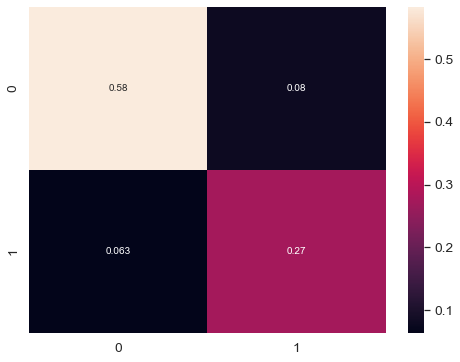

In [27]:
# cofusion matrix for RFC
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, rfc_predict)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

<AxesSubplot:>

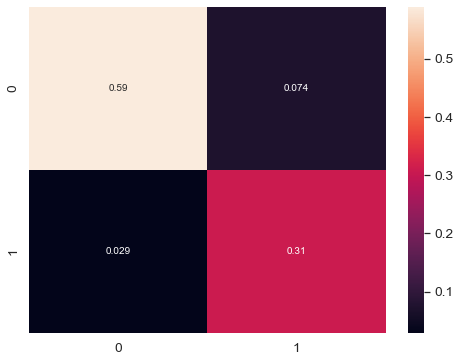

In [28]:
# cofusion matrix for Logistic Regression
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       116
           1       0.81      0.92      0.86        59

    accuracy                           0.90       175
   macro avg       0.88      0.90      0.89       175
weighted avg       0.90      0.90      0.90       175



In [30]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)   # Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [31]:
y_pred2 = knn.predict(X_test)

In [32]:
knn.score(X_test, y_test)

0.7257142857142858

In [33]:
print("K nearest neighbours model accuracy(in %):", metrics.accuracy_score(y_test, y_pred2)*100)

K nearest neighbours model accuracy(in %): 72.57142857142857


In [34]:
average_accuracy = 0
max = 0
for var in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=var)
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(X_train,y_train)
    y_pred2 = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred2)*100
    if (max < score):
        max = score
    average_accuracy += score

In [35]:
print (average_accuracy/100)
print (max)

73.54285714285714
81.14285714285714


<AxesSubplot:>

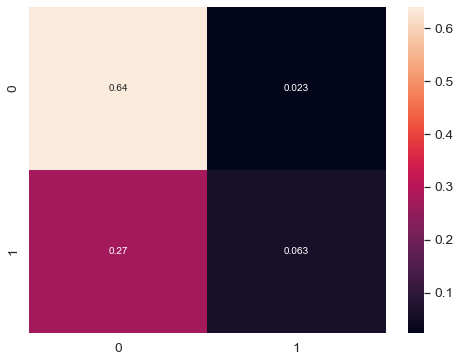

In [36]:
#Confusion Matrixfor KNN
plt.subplots(figsize=(8,6))
cf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':10})

In [37]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       116
           1       0.73      0.19      0.30        59

    accuracy                           0.70       175
   macro avg       0.72      0.58      0.55       175
weighted avg       0.71      0.70      0.64       175



# Cross Validation

In [38]:
from sklearn.model_selection import GridSearchCV


In [39]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=5, random_state=9)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.93396226, 0.87735849, 0.83018868, 0.91509434, 0.82857143])

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [41]:
scores = []

# Import Models & their parameters from the dictionary
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
  
# Make a Dataframe of the scores list with proper columns names
df3 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df3

,model,best_score,best_params
0,svm,0.880791,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.858005,{'n_estimators': 10}
2,logistic_regression,0.878922,{'C': 1}
